# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0, E_test is 0.10888000000000003
Average number of iterations is 4.907.


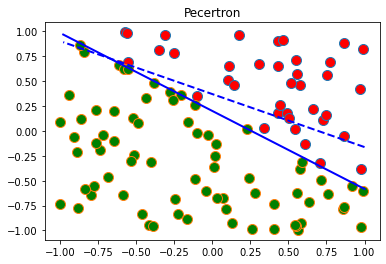

In [2]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 10 # number of training data
nTest = 100
average_iter = 0
E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train, y_train = X[:, : nTrain], y[:, :nTrain]
    X_test, y_test = X[:, nTrain: ], y[:, nTrain: ]
    
    w_g, iters = perceptron(X_train, y_train)
    
    # Compute training, testing error
    # Sum up number of iterations
    # w_g: p+1 * 1的列向量，X是p*N的矩阵
    average_iter += iters
    train_res = np.matmul(np.column_stack((np.ones((X_train.shape[1], 1)), X_train.T)), w_g)
    train_error = 0
    for i in range(train_res.shape[0]):
        if train_res[i][0] * y_train[0][i] <= 0:
            train_error += 1
    train_error /= nTrain
    E_train += train_error
    
    test_res = np.matmul(np.column_stack((np.ones((X_test.shape[1], 1)), X_test.T)), w_g)
    test_error = 0
    for i in range(test_res.shape[0]):
        if test_res[i][0] * y_test[0][i] <= 0:
            test_error += 1
    test_error /= nTest
    E_test += test_error

E_train /= nRep
E_test /= nRep
average_iter /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(average_iter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

E_train is 0.5, E_test is 0.22
Average number of iterations is 200.0.


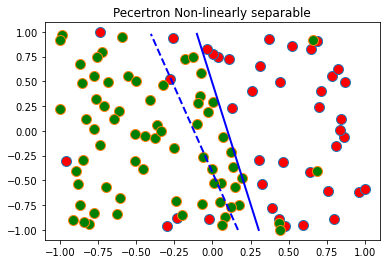

In [3]:
nRep = 1 # number of replicates
nTrain = 10 # number of training data
nTest = 100
average_iter = 0
E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    X_train, y_train = X[:, : nTrain], y[:, :nTrain]
    X_test, y_test = X[:, nTrain: ], y[:, nTrain: ]
    
    w_g, iters = perceptron(X_train, y_train)
    
    # Compute training, testing error
    # Sum up number of iterations
    # w_g: p+1 * 1的列向量，X是p*N的矩阵
    average_iter += iters
    train_res = np.matmul(np.column_stack((np.ones((X_train.shape[1], 1)), X_train.T)), w_g)
    train_error = 0
    for i in range(train_res.shape[0]):
        if train_res[i][0] * y_train[0][i] <= 0:
            train_error += 1
    train_error /= nTrain
    E_train += train_error
    
    test_res = np.matmul(np.column_stack((np.ones((X_test.shape[1], 1)), X_test.T)), w_g)
    test_error = 0
    for i in range(test_res.shape[0]):
        if test_res[i][0] * y_test[0][i] <= 0:
            test_error += 1
    test_error /= nTest
    E_test += test_error

E_train /= nRep
E_test /= nRep
average_iter /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(average_iter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


### Part3: Linear Regression

E_train is [0.30223192], E_test is [0.30288713]


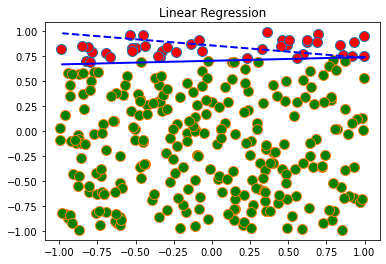

In [4]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 200

E_train = E_test = 0

for i in range(1):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train, y_train = X[:, : nTrain], y[:, :nTrain]
    X_test, y_test = X[:, nTrain: ], y[:, nTrain: ]
    
    w_g = linear_regression(X_train, y_train)
    
    # Compute training, testing error
    # 这里计算了基于MSE的训练误差和测试误差
    new_x = np.column_stack((np.ones((X_train.shape[1], 1)), X_train.T))
    for i in range(new_x.shape[0]):
        E_train += (np.matmul(new_x[i], w_g) - y_train[0][i]) ** 2
    E_train /= nTrain
    
    new_x_test = np.column_stack((np.ones((X_test.shape[1], 1)), X_test.T))
    for i in range(new_x_test.shape[0]):
        E_test += (np.matmul(new_x_test[i], w_g) - y_test[0][i]) ** 2
    E_test /= nTest
    
    
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is [0.46128194], E_test is [0.5506128]


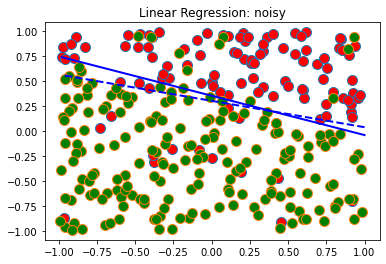

In [5]:
nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 200

E_train = E_test = 0

for i in range(1):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    X_train, y_train = X[:, : nTrain], y[:, :nTrain]
    X_test, y_test = X[:, nTrain: ], y[:, nTrain: ]
    
    w_g = linear_regression(X_train, y_train)
    
    # Compute training, testing error
    # 这里计算了基于MSE的训练误差和测试误差
    new_x = np.column_stack((np.ones((X_train.shape[1], 1)), X_train.T))
    for i in range(new_x.shape[0]):
        E_train += (np.matmul(new_x[i], w_g) - y_train[0][i]) ** 2
    E_train /= nTrain
    
    new_x_test = np.column_stack((np.ones((X_test.shape[1], 1)), X_test.T))
    for i in range(new_x_test.shape[0]):
        E_test += (np.matmul(new_x_test[i], w_g) - y_test[0][i]) ** 2
    E_test /= nTest
    
    
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [6]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error

# print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_t = X  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = X_test  # CHANGE THIS LINE TO DO TRANSFORMATION
w = linear_regression(X_t, y)
# Compute training, testing error
# print('E_train is {}, E_test is {}'.format(E_train, E_test))

## Part6: Logistic Regression

E_train is 0.010300000000000007, E_test is 0.018299999999999986


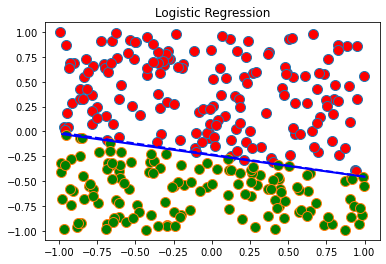

In [7]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100 # number of replicates
nTrain = 100 # number of training data
nTest = 200
E_train = 0
E_test = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train, y_train = X[:, : nTrain], y[:, :nTrain]
    X_test, y_test = X[:, nTrain: ], y[:, nTrain: ]
    w_g = logistic(X_train, y_train)
    # Compute training, testing error
    def sigmoid(theta, x):
        return 1.0 / (1 + np.exp(-np.squeeze(np.matmul(theta.T, x))))

    X_train = np.concatenate((np.ones((1, nTrain)), X_train), axis = 0)
    train_res = y_train * (2 * sigmoid(w_g, X_train) - 0.5)
    train_error = np.sum(train_res <= 0) / nTrain
    E_train += train_error
    
    X_test = np.concatenate((np.ones((1, nTest)), X_test), axis = 0)
    test_res = y_test * (2 * sigmoid(w_g, X_test) - 0.5)
    test_error = np.sum(test_res <= 0) / nTest
    E_test += test_error
    
E_test /= nRep
E_train /= nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.24500000000000002, E_test is 0.2551000000000001


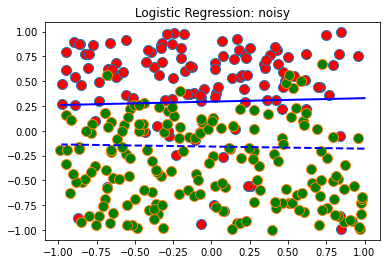

In [8]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100 # number of replicates
nTrain = 100 # number of training data
nTest = 200
E_train = 0
E_test = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    X_train, y_train = X[:, : nTrain], y[:, :nTrain]
    X_test, y_test = X[:, nTrain: ], y[:, nTrain: ]
    w_g = logistic(X_train, y_train)
    # Compute training, testing error
    def sigmoid(theta, x):
        return 1.0 / (1 + np.exp(-np.squeeze(np.matmul(theta.T, x))))

    X_train = np.concatenate((np.ones((1, nTrain)), X_train), axis = 0)
    train_res = y_train * (2 * sigmoid(w_g, X_train) - 0.5)
    train_error = np.sum(train_res <= 0) / nTrain
    E_train += train_error
    
    X_test = np.concatenate((np.ones((1, nTest)), X_test), axis = 0)
    test_res = y_test * (2 * sigmoid(w_g, X_test) - 0.5)
    test_error = np.sum(test_res <= 0) / nTest
    E_test += test_error
    
E_test /= nRep
E_train /= nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 0.0, E_test is 0.009759999999999996
Average number of support vectors is 2.93.


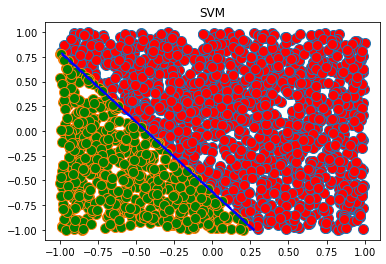

In [19]:
from svm import svm

nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 2000
E_train = 0
E_test = 0
average_num = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train, y_train = X[:, : nTrain], y[:, :nTrain]
    X_test, y_test = X[:, nTrain: ], y[:, nTrain: ]
    w_g, num_sc = svm(X_train, y_train)
    
    # Compute training, testing error
    # Sum up number of support vectors
    average_num += num_sc
    train_res = y_train * np.matmul(w_g.T, np.concatenate((np.ones((1, nTrain)), X_train), axis=0))
    train_error = np.sum(train_res <= 0) / nTrain
    E_train += train_error
    
    test_res = y_test * np.matmul(w_g.T, np.concatenate((np.ones((1, nTest)), X_test), axis=0))
    test_error = np.sum(test_res <= 0) / nTest
    E_test += test_error

E_train /= nRep
E_test /= nRep
average_num /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(average_num))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.